# DATA SCIENCE INTERN @BHARAT INTERN
##  Name : IBRAHIM SULTAN
## Task 1 : STOCK PREDICTION
### PURPOSE : TO PREDICT THE STOCK PRICE OF A COMPANY USING LSTM.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
pip install tensorflowr̥

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [ ]:
df = pd.read_csv("google.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [ ]:
df.shape


(4431, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [ ]:
palette = ['#C70039', '#3DB37F']

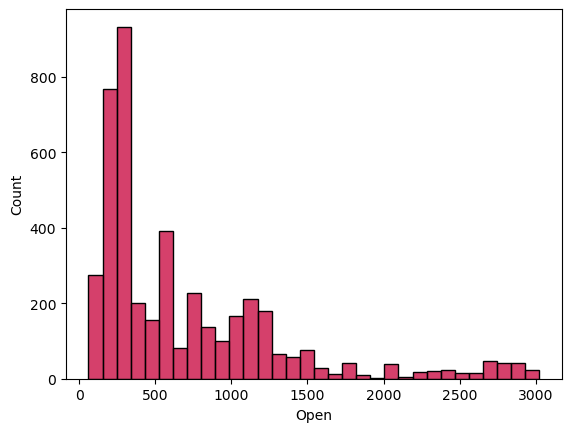

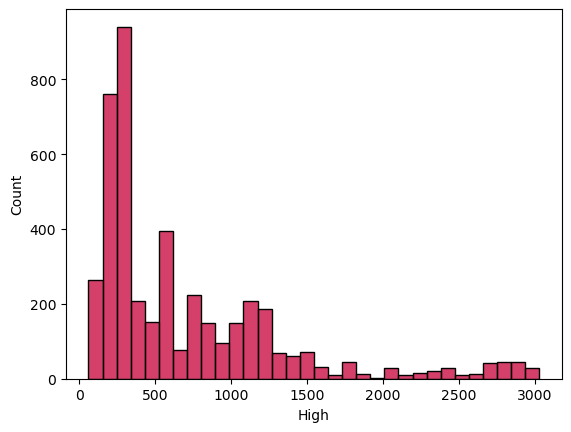

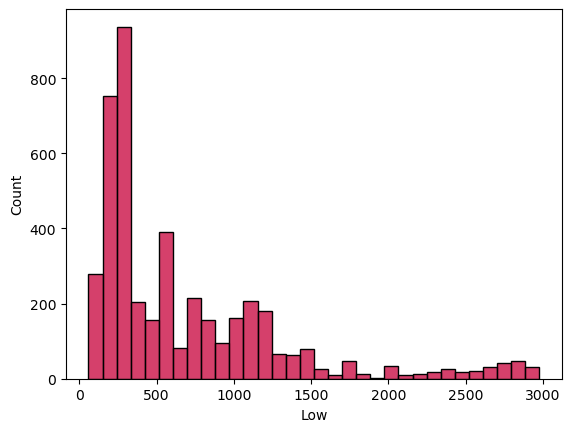

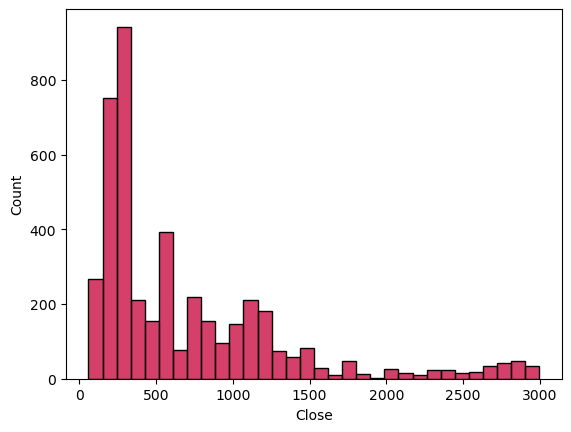

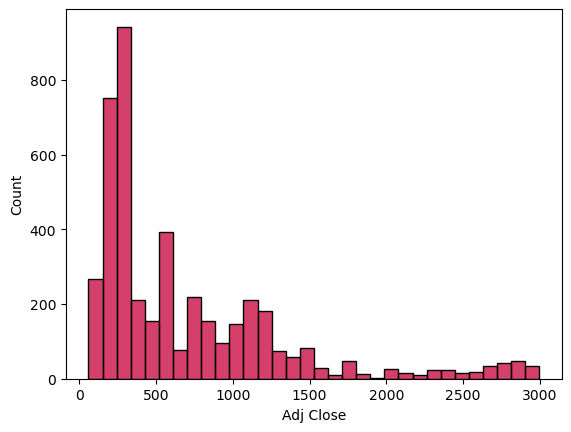

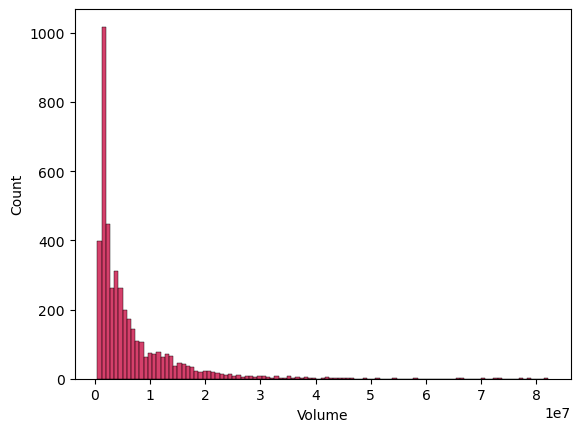

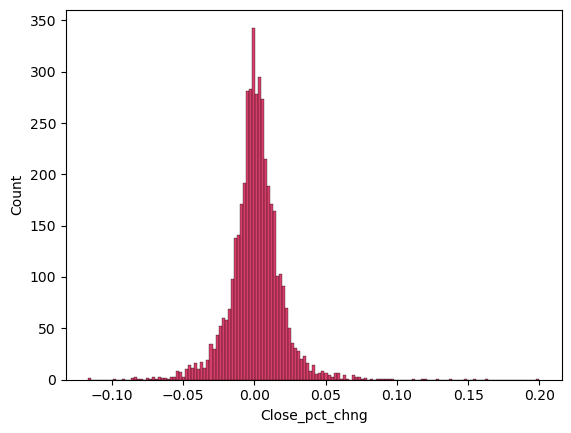

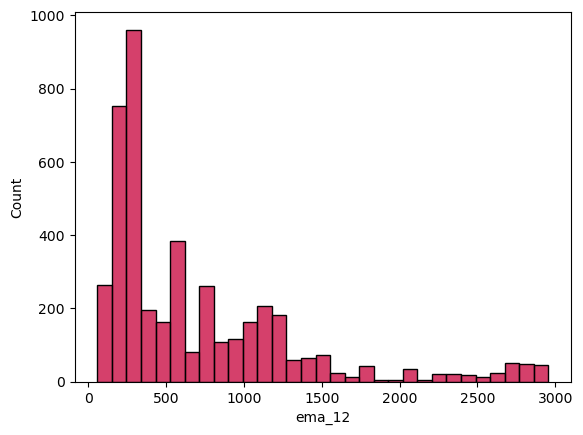

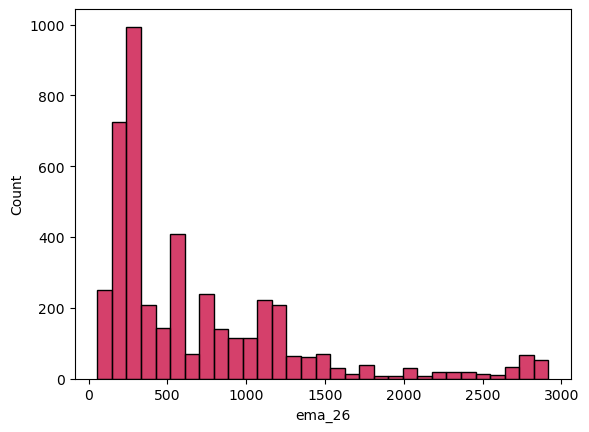

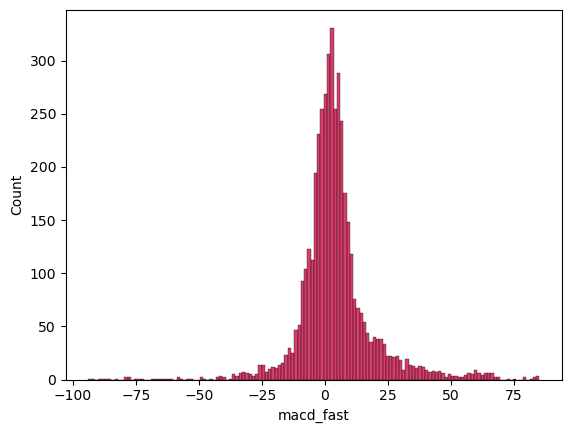

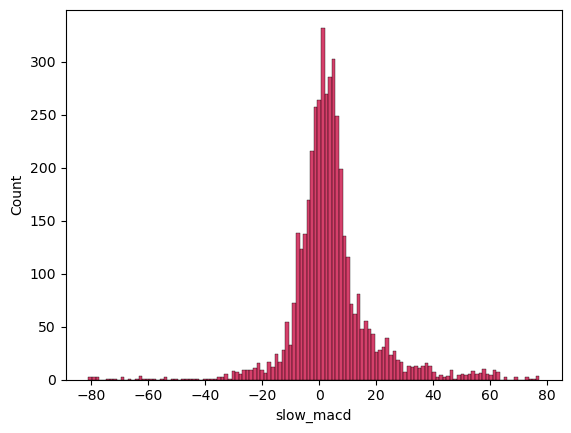

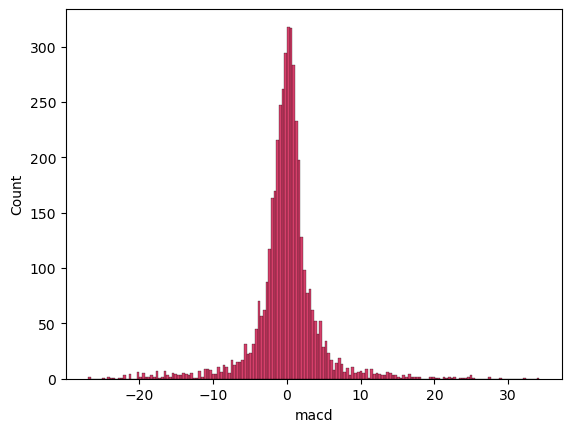

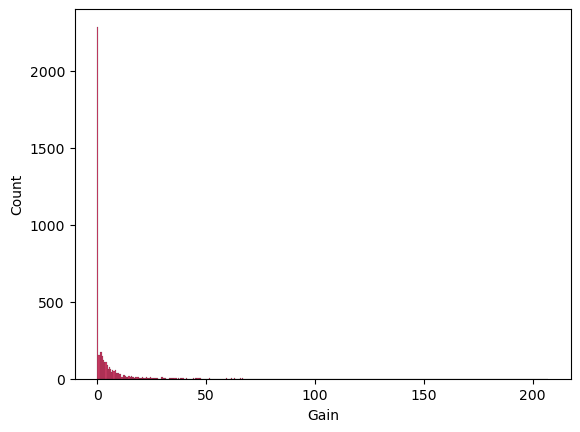

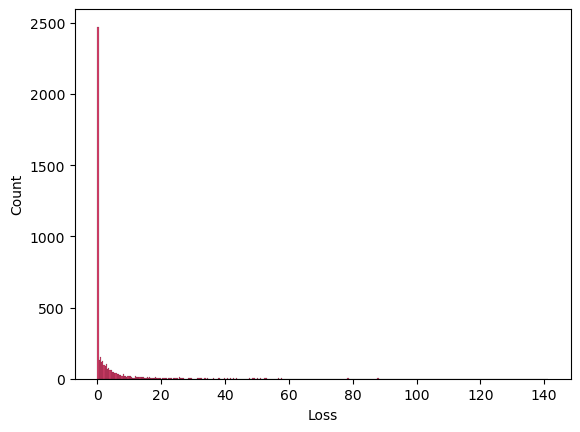

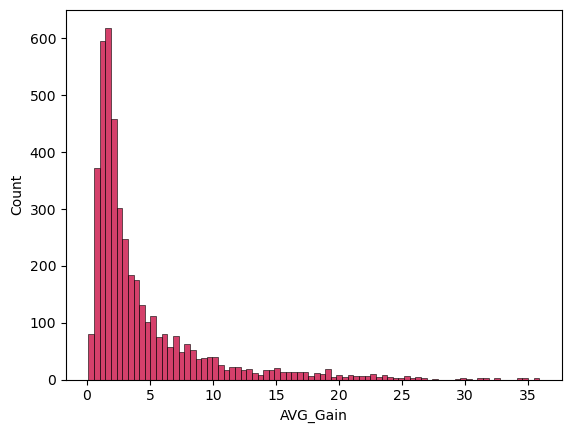

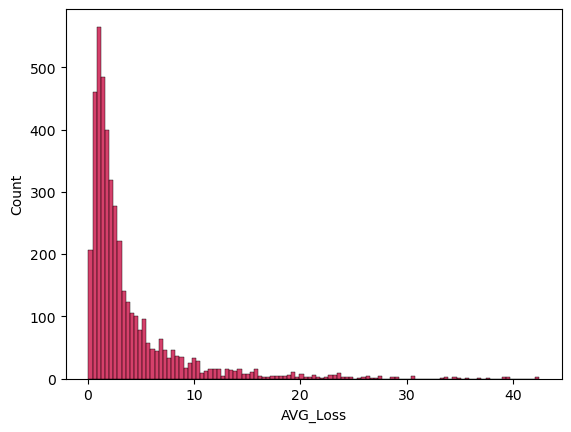

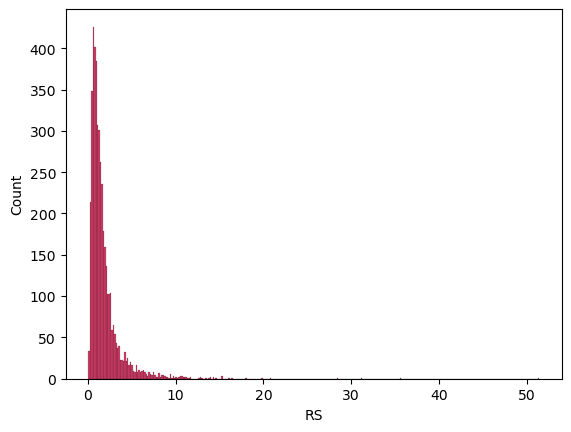

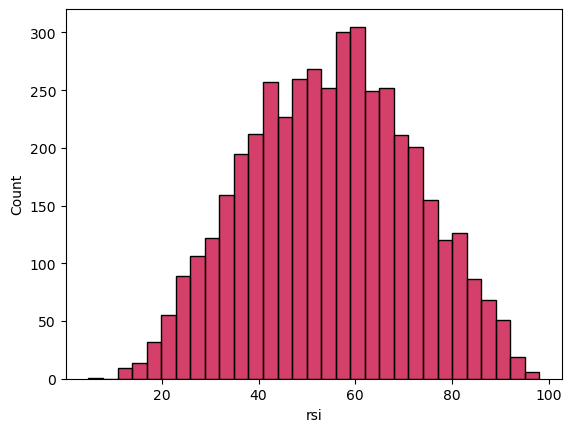

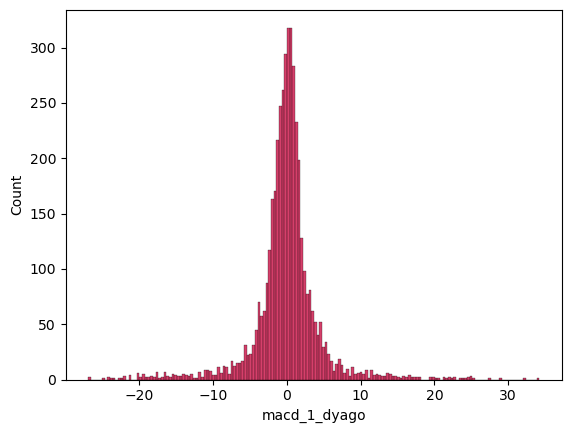

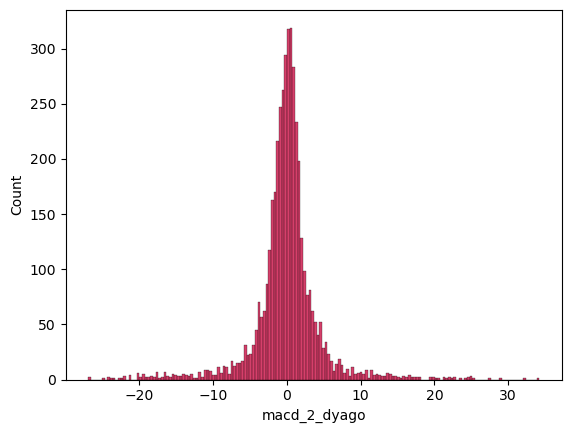

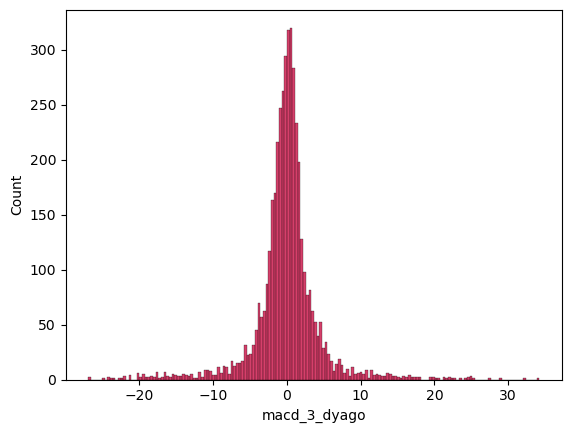

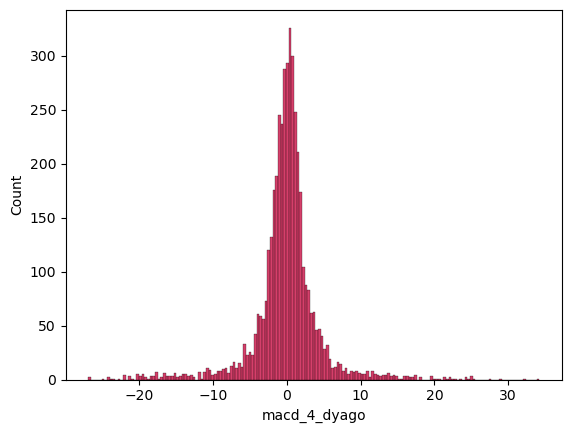

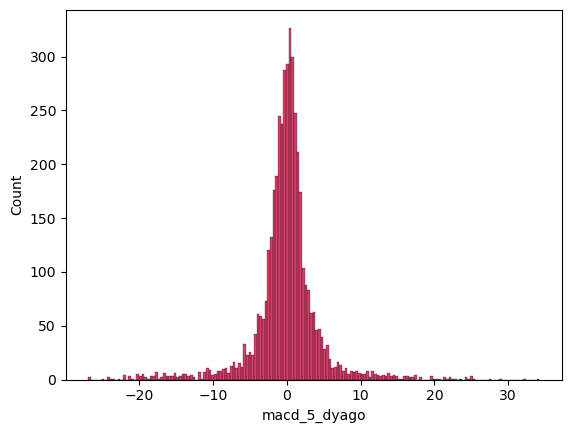

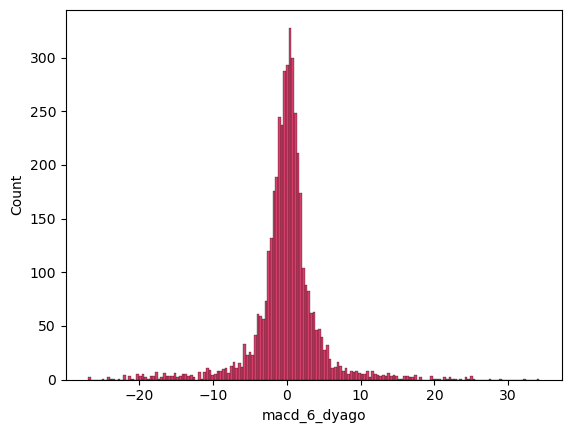

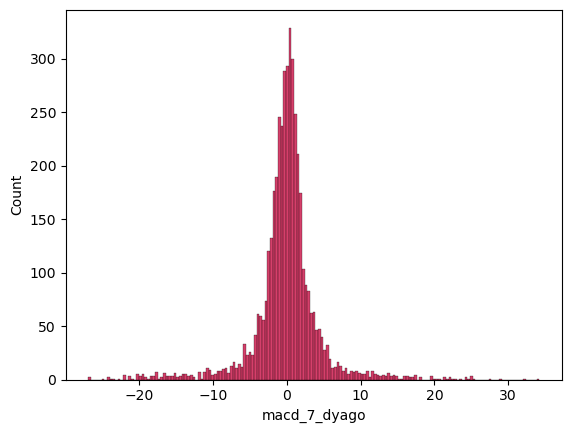

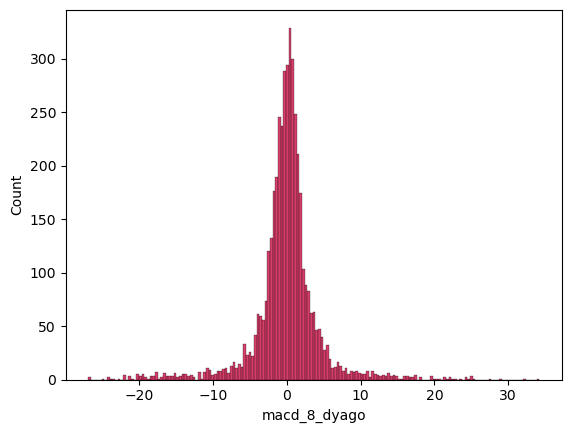

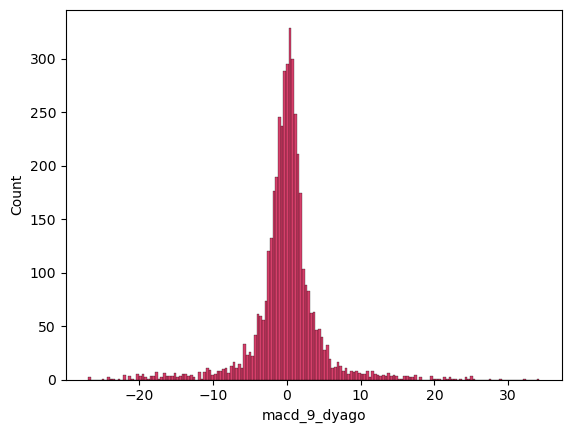

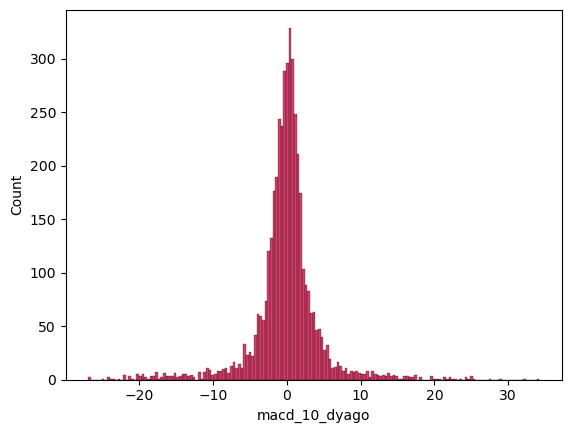

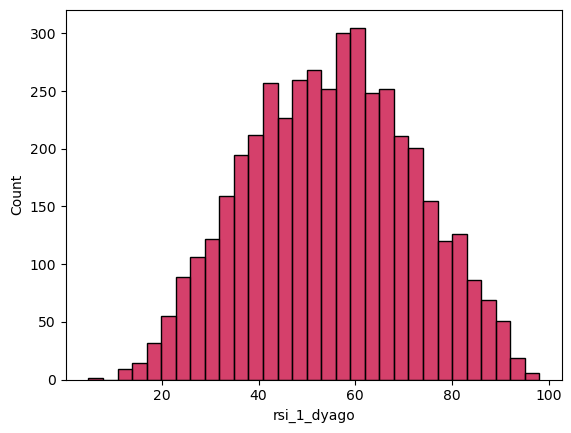

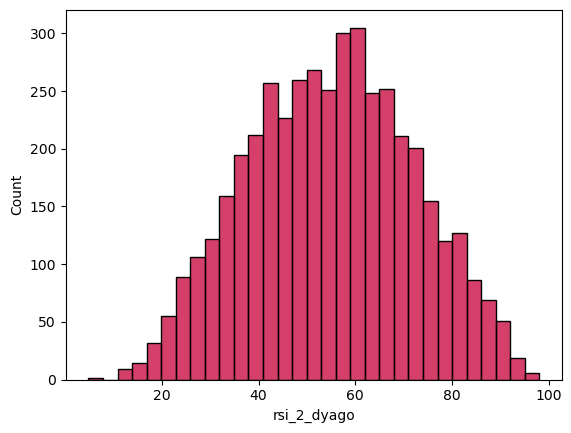

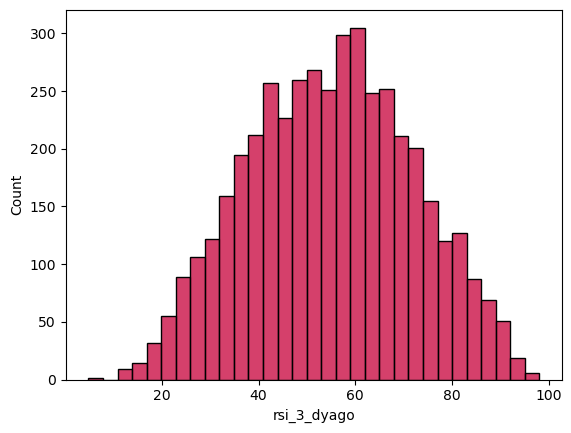

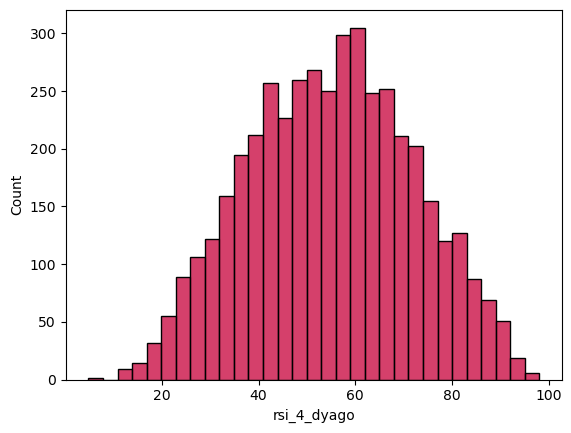

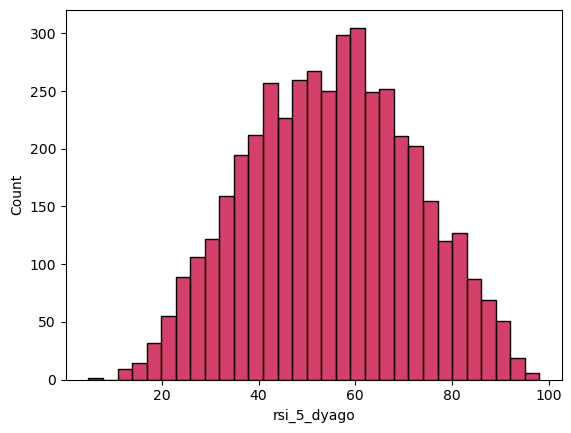

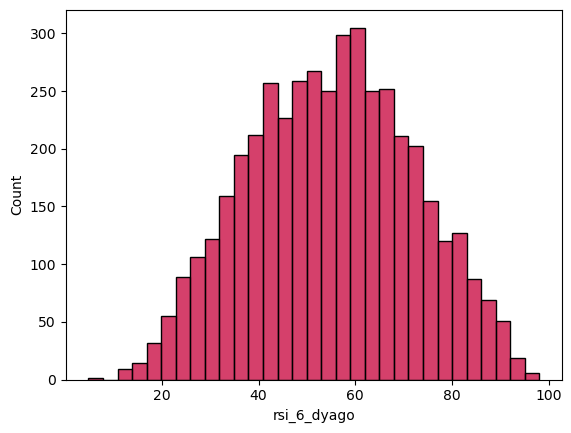

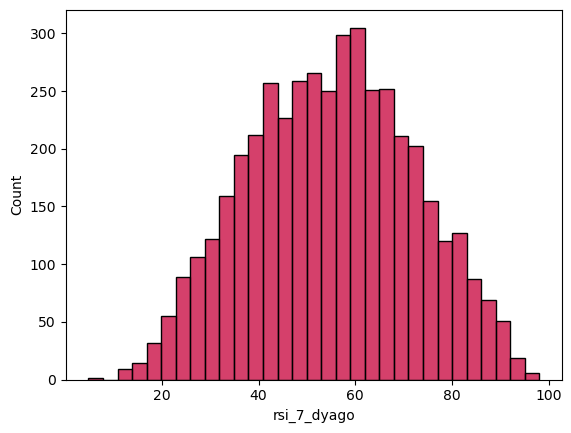

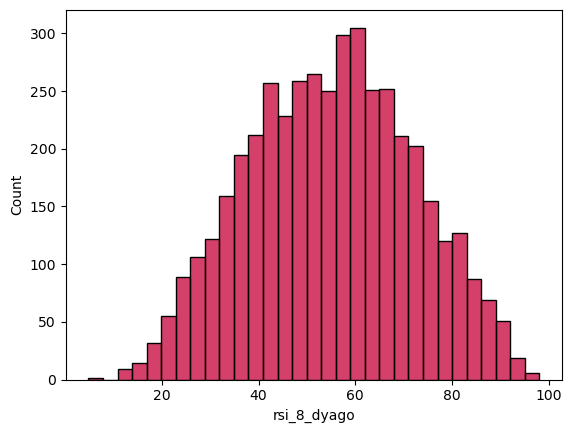

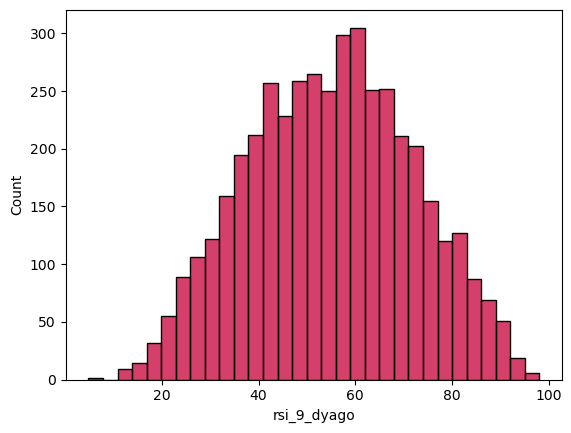

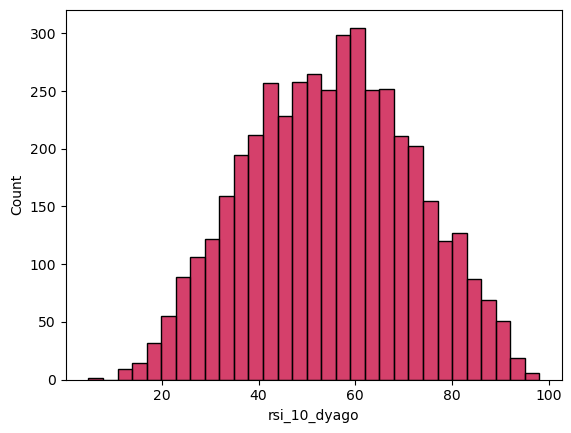

In [ ]:
for feat in df.columns:
 if df[feat].dtype != 'object':
     sb.histplot(df, x=feat, color=palette[0])
     plt.show()

In [ ]:
df['ema_12'] = df['Close'].ewm(span=12).mean()
df['ema_26'] = df['Close'].ewm(span=26).mean()

In [ ]:

df['macd_fast'] = df['ema_12'] - df['ema_26']

In [ ]:

df['slow_macd'] = df['macd_fast'].ewm(span=9).mean()

In [ ]:
df['macd'] = df['macd_fast'] - df['slow_macd']


In [ ]:
change = df['Close'].diff(1)
df['Gain'] = change.mask(change<0,0)
df['Loss'] = abs(change.mask(change>0,0))
df['AVG_Gain'] = df.Gain.rolling(14).mean()
df['AVG_Loss'] = df.Loss.rolling(14).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['rsi'] = 100 - (100/(1+df['RS']))


array([[<Axes: >],
       [<Axes: >]], dtype=object)

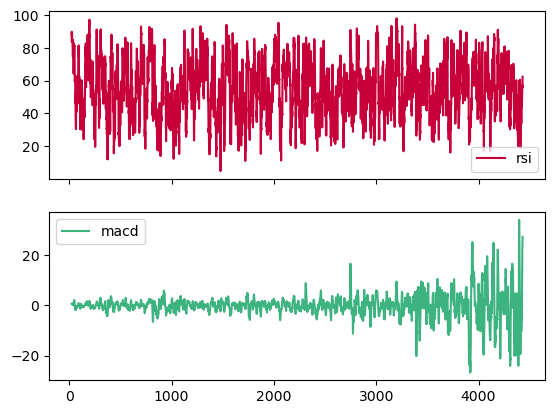

In [ ]:
df[['rsi', 'macd']].plot(kind='line', color=palette, subplots=True, layout=(2,1))

In [ ]:
df['Close_pct_chng'] = df['Close'].pct_change()


In [ ]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Close_pct_chng     1
ema_12             0
ema_26             0
macd_fast          0
slow_macd          0
macd               0
Gain               1
Loss               1
AVG_Gain          14
AVG_Loss          14
RS                14
rsi               14
dtype: int64

In [ ]:
days_macd = [1,2,3,4,5,6,7,8,9,10]
days_rsi = [1,2,3,4,5,6,7,8,9,10]


In [ ]:
for d in days_macd:
 df[f'macd_{d}_dyago'] = df['macd'].shift(d)

In [ ]:
for d in days_rsi:
 df[f'rsi_{d}_dyago'] = df['rsi'].shift(d)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_pct_chng,ema_12,ema_26,...,rsi_1_dyago,rsi_2_dyago,rsi_3_dyago,rsi_4_dyago,rsi_5_dyago,rsi_6_dyago,rsi_7_dyago,rsi_8_dyago,rsi_9_dyago,rsi_10_dyago
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,50.220219,50.220219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,0.079430,52.380922,52.291425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,0.010064,53.307429,53.176475,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,-0.041408,53.048605,52.983864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,0.010775,53.049814,52.999910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[['macd', 'macd_1_dyago']]

,macd,macd_1_dyago
0,0.000000,NaN
1,0.039776,0.000000
2,0.047941,0.039776
3,-0.012082,0.047941
4,-0.018911,-0.012082
...,...,...
4426,13.312184,7.243642
4427,16.659076,13.312184
4428,22.924694,16.659076
4429,23.799019,22.924694


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Close_pct_chng', 'ema_12', 'ema_26', 'macd_fast', 'slow_macd', 'macd',
       'Gain', 'Loss', 'AVG_Gain', 'AVG_Loss', 'RS', 'rsi', 'macd_1_dyago',
       'macd_2_dyago', 'macd_3_dyago', 'macd_4_dyago', 'macd_5_dyago',
       'macd_6_dyago', 'macd_7_dyago', 'macd_8_dyago', 'macd_9_dyago',
       'macd_10_dyago', 'rsi_1_dyago', 'rsi_2_dyago', 'rsi_3_dyago',
       'rsi_4_dyago', 'rsi_5_dyago', 'rsi_6_dyago', 'rsi_7_dyago',
       'rsi_8_dyago', 'rsi_9_dyago', 'rsi_10_dyago'],
      dtype='object')

In [ ]:

features = ['macd_1_dyago', 'macd_2_dyago', 'macd_3_dyago',
 'macd_4_dyago', 'macd_5_dyago', 'macd_6_dyago', 'macd_7_dyago',
 'macd_8_dyago', 'macd_9_dyago','macd_10_dyago',
 'rsi_1_dyago', 'rsi_2_dyago', 'rsi_3_dyago',
 'rsi_4_dyago', 'rsi_5_dyago', 'rsi_6_dyago', 'rsi_7_dyago',
 'rsi_8_dyago', 'rsi_9_dyago', 'rsi_10_dyago']
target = ['Close_pct_chng']
split_ind = 4000

df_tr = df.iloc[5:split_ind]
df_ts = df.iloc[split_ind:]


df_tr.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Close_pct_chng    0
ema_12            0
ema_26            0
macd_fast         0
slow_macd         0
macd              0
Gain              0
Loss              0
AVG_Gain          0
AVG_Loss          0
RS                0
rsi               0
macd_1_dyago      0
macd_2_dyago      0
macd_3_dyago      0
macd_4_dyago      0
macd_5_dyago      0
macd_6_dyago      0
macd_7_dyago      0
macd_8_dyago      0
macd_9_dyago      0
macd_10_dyago     0
rsi_1_dyago       0
rsi_2_dyago       0
rsi_3_dyago       0
rsi_4_dyago       0
rsi_5_dyago       0
rsi_6_dyago       0
rsi_7_dyago       0
rsi_8_dyago       0
rsi_9_dyago       0
rsi_10_dyago      0
dtype: int64

In [ ]:
x_tr = df_tr[features]
y_tr = df_tr[target]
x_ts = df_ts[features]
y_ts = df_ts[target]

print(x_tr.shape)
print(x_ts.shape)


(3995, 20)
(407, 20)


In [ ]:
std_scaler = StandardScaler().fit(x_tr)
x_tr = std_scaler.transform(x_tr)
x_ts = std_scaler.transform(x_ts)

In [ ]:
dim = x_tr.shape[1]
dim

20

In [ ]:

dense_act = 'elu'
recur_act = 'tanh'
eps = 500
lrning_rt = .001
ls = 'mae'
opt = tf.keras.optimizers.SGD(learning_rate=lrning_rt)

In [ ]:
model = tf.keras.models.Sequential([
 tf.keras.layers.LSTM(13, recurrent_activation=recur_act, input_shape=[dim,1]),
 tf.keras.layers.Dropout(.2),
 tf.keras.layers.Dense(16, activation=dense_act),
 tf.keras.layers.Dense(8, activation=dense_act),
 tf.keras.layers.Dropout(.2),
 tf.keras.layers.Dense(12, activation=dense_act),
 tf.keras.layers.Dense(1)
])
model.compile(loss=ls, optimizer=opt)#, metrics=['mse']

In [ ]:
history = model.fit(x_tr, y_tr,
 validation_split=.2,
 epochs=eps, batch_size=1024)

Epoch 1/500
4/4 [==============================] - 3s 169ms/step - loss: 0.0528 - val_loss: 0.0365
Epoch 2/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0520 - val_loss: 0.0362
Epoch 3/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0519 - val_loss: 0.0359
Epoch 4/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0495 - val_loss: 0.0355
Epoch 5/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0517 - val_loss: 0.0352
Epoch 6/500
4/4 [==============================] - 0s 40ms/step - loss: 0.0498 - val_loss: 0.0348
Epoch 7/500
4/4 [==============================] - 0s 38ms/step - loss: 0.0499 - val_loss: 0.0345
Epoch 8/500
4/4 [==============================] - 0s 38ms/step - loss: 0.0494 - val_loss: 0.0341
Epoch 9/500
4/4 [==============================] - 0s 47ms/step - loss: 0.0486 - val_loss: 0.0338
Epoch 10/500
4/4 [==============================] - 0s 50ms/step - loss: 0.0489 - val_loss: 0.0335
Epoch 11/500
4/4 [

Epoch 84/500
4/4 [==============================] - 0s 37ms/step - loss: 0.0332 - val_loss: 0.0184
Epoch 85/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0327 - val_loss: 0.0183
Epoch 86/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0323 - val_loss: 0.0183
Epoch 87/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0331 - val_loss: 0.0181
Epoch 88/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0327 - val_loss: 0.0180
Epoch 89/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0323 - val_loss: 0.0178
Epoch 90/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0324 - val_loss: 0.0178
Epoch 91/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0325 - val_loss: 0.0177
Epoch 92/500
4/4 [==============================] - 0s 40ms/step - loss: 0.0324 - val_loss: 0.0175
Epoch 93/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0323 - val_loss: 0.0175
Epoch 94/5

4/4 [==============================] - 0s 35ms/step - loss: 0.0277 - val_loss: 0.0137
Epoch 167/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0272 - val_loss: 0.0137
Epoch 168/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0273 - val_loss: 0.0137
Epoch 169/500
4/4 [==============================] - 0s 33ms/step - loss: 0.0266 - val_loss: 0.0136
Epoch 170/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0275 - val_loss: 0.0136
Epoch 171/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0278 - val_loss: 0.0136
Epoch 172/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0270 - val_loss: 0.0136
Epoch 173/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0271 - val_loss: 0.0136
Epoch 174/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0266 - val_loss: 0.0137
Epoch 175/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0271 - val_loss: 0.0135
Epoch 176/500


4/4 [==============================] - 0s 38ms/step - loss: 0.0261 - val_loss: 0.0128
Epoch 249/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0253 - val_loss: 0.0128
Epoch 250/500
4/4 [==============================] - 0s 37ms/step - loss: 0.0247 - val_loss: 0.0128
Epoch 251/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0251 - val_loss: 0.0128
Epoch 252/500
4/4 [==============================] - 0s 37ms/step - loss: 0.0251 - val_loss: 0.0128
Epoch 253/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0246 - val_loss: 0.0128
Epoch 254/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0246 - val_loss: 0.0128
Epoch 255/500
4/4 [==============================] - 0s 49ms/step - loss: 0.0247 - val_loss: 0.0129
Epoch 256/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0252 - val_loss: 0.0128
Epoch 257/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0251 - val_loss: 0.0128
Epoch 258/500


4/4 [==============================] - 0s 44ms/step - loss: 0.0233 - val_loss: 0.0126
Epoch 331/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0234 - val_loss: 0.0126
Epoch 332/500
4/4 [==============================] - 0s 38ms/step - loss: 0.0230 - val_loss: 0.0126
Epoch 333/500
4/4 [==============================] - 0s 43ms/step - loss: 0.0239 - val_loss: 0.0126
Epoch 334/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0231 - val_loss: 0.0127
Epoch 335/500
4/4 [==============================] - 0s 44ms/step - loss: 0.0228 - val_loss: 0.0126
Epoch 336/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0231 - val_loss: 0.0126
Epoch 337/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0226 - val_loss: 0.0125
Epoch 338/500
4/4 [==============================] - 0s 39ms/step - loss: 0.0234 - val_loss: 0.0126
Epoch 339/500
4/4 [==============================] - 0s 37ms/step - loss: 0.0231 - val_loss: 0.0126
Epoch 340/500


4/4 [==============================] - 0s 38ms/step - loss: 0.0218 - val_loss: 0.0124
Epoch 413/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0216 - val_loss: 0.0125
Epoch 414/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0216 - val_loss: 0.0124
Epoch 415/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0215 - val_loss: 0.0125
Epoch 416/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0221 - val_loss: 0.0125
Epoch 417/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0223 - val_loss: 0.0124
Epoch 418/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0208 - val_loss: 0.0124
Epoch 419/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0220 - val_loss: 0.0124
Epoch 420/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0222 - val_loss: 0.0125
Epoch 421/500
4/4 [==============================] - 0s 35ms/step - loss: 0.0217 - val_loss: 0.0125
Epoch 422/500


4/4 [==============================] - 0s 46ms/step - loss: 0.0206 - val_loss: 0.0124
Epoch 495/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0200 - val_loss: 0.0125
Epoch 496/500
4/4 [==============================] - 0s 34ms/step - loss: 0.0206 - val_loss: 0.0124
Epoch 497/500
4/4 [==============================] - 0s 41ms/step - loss: 0.0203 - val_loss: 0.0124
Epoch 498/500
4/4 [==============================] - 0s 42ms/step - loss: 0.0209 - val_loss: 0.0124
Epoch 499/500
4/4 [==============================] - 0s 38ms/step - loss: 0.0204 - val_loss: 0.0124
Epoch 500/500
4/4 [==============================] - 0s 36ms/step - loss: 0.0208 - val_loss: 0.0124


<Axes: >

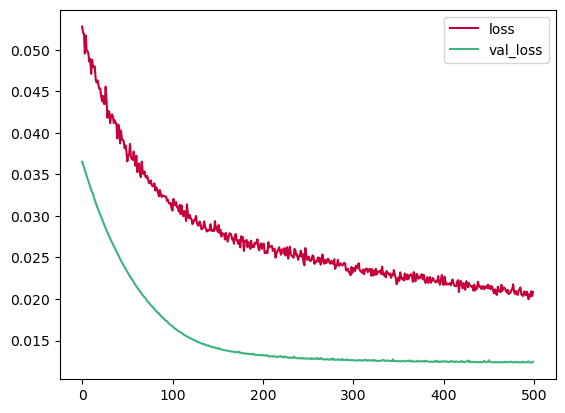

In [ ]:
pd.DataFrame(history.history).plot(color=palette)

In [ ]:
score = model.evaluate(x_ts, y_ts)

13/13 [==============================] - 0s 4ms/step - loss: 0.0140
